# Import Packages

In [2]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from pyvis.network import Network

# Gather Data

In [30]:
course = 'ABC 106' # course name
data = pd.read_csv('../Data/'+str(course)+'.csv',encoding= 'unicode_escape') # load csv data file

topics = data["Topic"].tolist() # get all topics in the course

size_data = data["Size"].tolist() # get a topic sizes
topic_size = dict(zip(topics,size_data)) # create topic size dictionary

edge_data = data["Edges To"].tolist() # get edges
edge_dict = {topic: edges.split(';') if isinstance(edges, str) else [] for topic, edges in zip(topics, edge_data)} # unpack edges and write to dictionary

# Build Graph

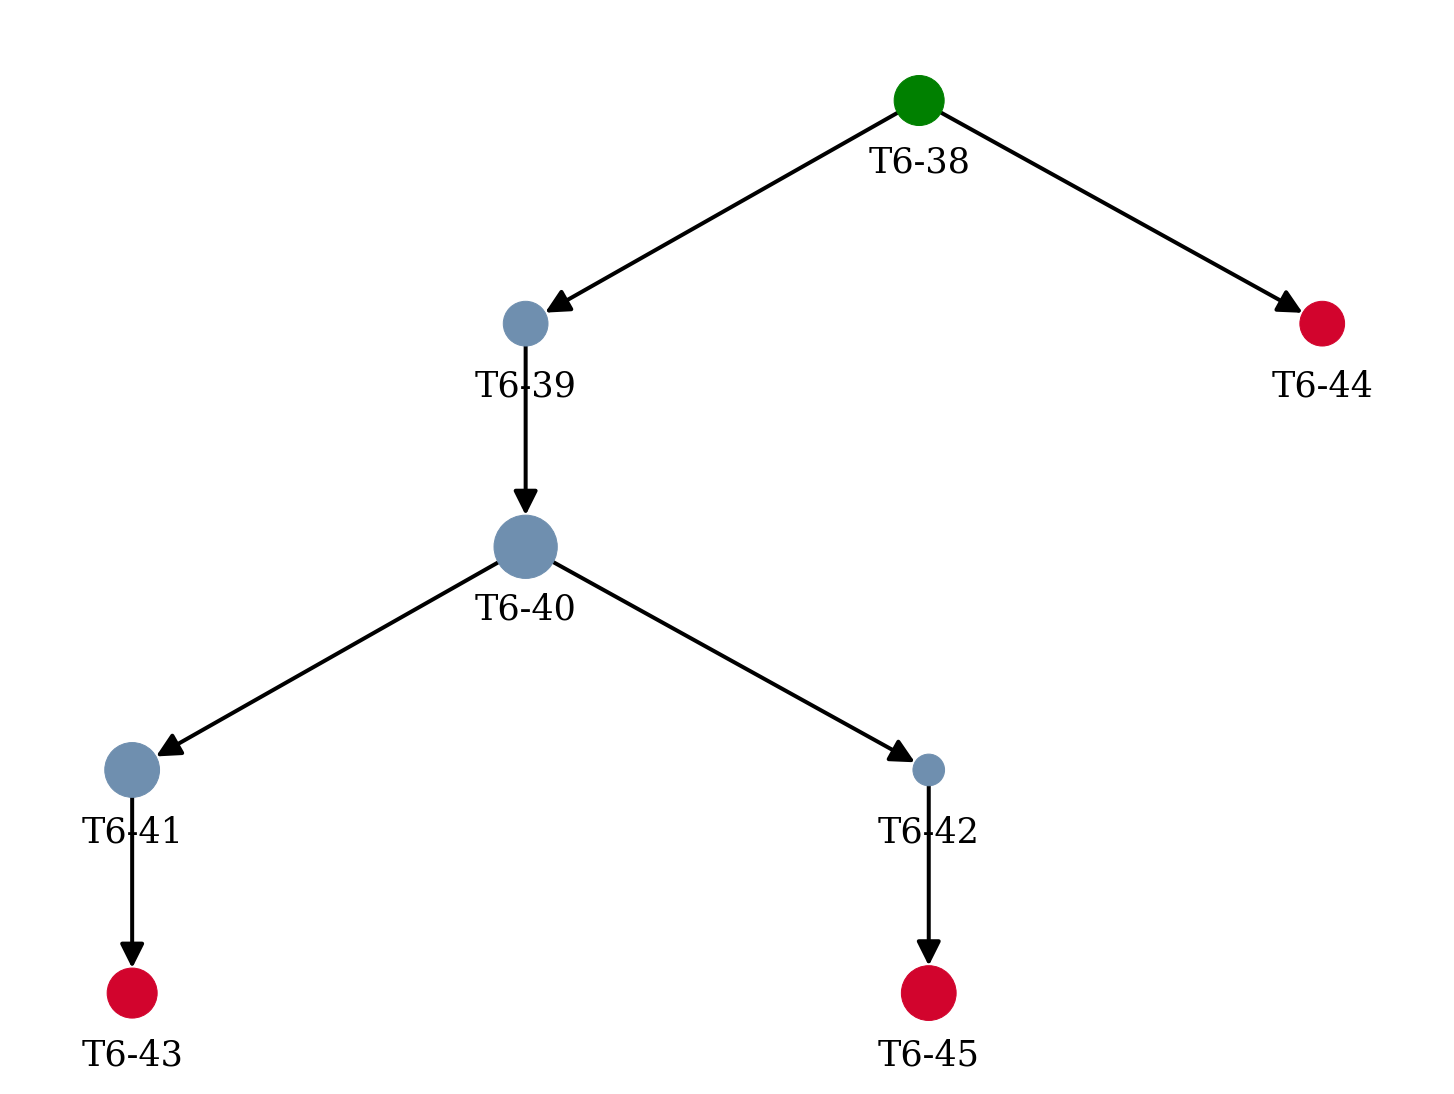

In [31]:
graph = nx.DiGraph() # initiate graph

for source, dests in edge_dict.items():
    graph.add_node(source) # add node
    for dest in dests:
        graph.add_edge(source, dest) # add edges
        
pos = nx.nx_agraph.graphviz_layout(graph,prog='dot',args='-Grankdir=TB -Granksep=equally -Gnodesep=equally -Grank=max') # get node layout

node_size = {}
node_color = {}
for node in graph.nodes:
    successors = list(graph.successors(node))
    predecessors = list(graph.predecessors(node))
    connections = len(successors) + len(predecessors)
    node_size[node] = topic_size[node]
    node_color[node] = '#6F8FAF' # blue if topic has successors and predecessors
    if len(successors) == 0:
        node_color[node] = '#D2042D' # red if terminal topic
    if len(predecessors) == 0:
        node_color[node] = '#008000' # green if into topic
    if connections == 0:
        node_color[node] = '#000000' # black if no successors or predecessors

label_pos = {}
for node in graph.nodes:
    label_pos[node] = (pos[node][0], pos[node][1] - 25*max(node_size.values())) # shift label position down
        
course_figure = plt.figure(figsize=(20,15))
nx.draw(graph, pos, with_labels=False, node_size=[5000*v for v in node_size.values()], node_color=[v for v in node_color.values()],
        arrowsize=50, width=4, edge_color='#000000') # draw graph
labels = nx.draw_networkx_labels(graph, label_pos, font_size=35, font_family='serif') # write labels
course_figure.savefig("../Course Graphs/"+str(course)+".pdf",format="pdf") # save graph

## Make Graph Interactive

In [32]:
net = Network(directed = True, notebook=True, width="1920px", height="1080px")
net.from_nx(graph)
for node in net.get_nodes():
    net.get_node(node)['x'] = pos[node][0]
    net.get_node(node)['y'] = -pos[node][1] 
    net.get_node(node)['physics'] = False
    net.get_node(node)['label'] = str(node)
    successors = list(graph.successors(node))
    predecessors = list(graph.predecessors(node))
    connections = len(successors) + len(predecessors)
    net.get_node(node)['title'] = f"Size: {topic_size[node]} credits\nConnected Componets: {connections}\nPredecessors: {predecessors}\nSuccessors: {successors}"
    net.get_node(node)['size'] = topic_size[node] * 30  
    if len(successors) == 0:
        net.get_node(node)['color'] = 'red'
    if len(predecessors) == 0:
        net.get_node(node)['color'] = 'green'
    if connections == 0:
        net.get_node(node)['color'] = 'black'    

net.toggle_physics(False)
net.show('../Course Graphs/'+str(course)+'.html')

../Course Graphs/ABC 106.html
